# Demultiplexing de Secuencias

El ejercicio se basa en crear los métodos para hacer cada uno de los siguientes pasos.
El proceso que importa aquí es el llamado demultiplexing de las secuencias, en donde vienen marcadas con identificadores específicos y deben ser separadas ya que son de muestras diferentes.

1. Generar una secuencia con bases aleatorias
2. Generar secuenias aleatorias con un marcador al inicio de la misma, el método por parámetro recibe el total de secuencias, el total de marcadores, el largo de las secuencias y el largo de los marcadores.
3. Escribir las secuencias en un archivo fasta, generando un nombre para cada secuencia no el identificador
4. Leer las secuencias con BioPython y separarlas con base en el marcador que la identifica, esto seria tener listas individuales para cada marcador   
   
     
       Tip: usar choice para seleccionar una letra a la vez
       Tip: from random import shuffle para mezclar la lista generada
    
Se puede crear los métodos en el cuaderno de Jupyper para facilitar las pruebas, pero al final vamos a crear un archivo .py con los métodos y correrlo en línea de comandos
 

# Limpieza de Secuencias

El siguiente codigo no va a funcionar, tiene partes faltantes, completelas y cree un archivo `.py` para poder ser ejecutado en la linea de comandos 

In [ ]:
import sys
from ?? import SeqIO

def sequence_cleaner(fasta_file, min_length=0, por_n=100):
    # Create our hash table to add the sequences
    sequences={}

    # Using the Biopython fasta parse we can read our fasta input
    for seq_record in SeqIO.parse(fasta_file, ??):
        # Take the current sequence and convert to upper case
        sequence = ??
        # Check if the current sequence is according to the user parameters
        if (?? and
            (float(sequence.count("N"))/float(len(sequence)))*100 <= por_n):
        
        # If the sequence passed in the test "is it clean?" and it isn't in the
        # hash table, the sequence and its id are going to be in the hash
            ??:
                sequences[sequence] = seq_record.id
       # If it is already in the hash table, we're just gonna concatenate the ID
       # of the current sequence to another one that is already in the hash table
            else:
                sequences[sequence] += "_" + seq_record.id


    # Write the clean sequences

    # Create a file in the same directory where you ran this script
    with open("clear_" + fasta_file, ??) as output_file:
        # Just read the hash table and write on the file as a fasta format
        for sequence in sequences:
            output_file.write(">" + sequences[sequence] + "\n" + sequence + "\n")

    print("CLEAN!!!\nPlease check clear_" + fasta_file)


userParameters = sys.argv[1:]

try:
    if len(userParameters) == 1:
        sequence_cleaner(userParameters[0])
    elif len(userParameters) == 2:
        sequence_cleaner(userParameters[0], float(userParameters[1]))
    elif len(userParameters) == 3:
        sequence_cleaner(userParameters[0], ??, ??))
    else:
        print(??)
except:
    print(??)

# Plotting

El siguiente código grafica los tamaños de las secuencias del archivo `ls_orchid.fasta`. Utilice el mismo código para hacer una gráfica pero con la calidad de las lecturas del archivo `200reads.fastq`, donde exista un método que reciba el valor de la calida mínima a tomar en cuenta para la graficación.

`pylab` es similiar a `pyplot` y se usa de la misma manera. Puede usar cualquiera de los dos. 

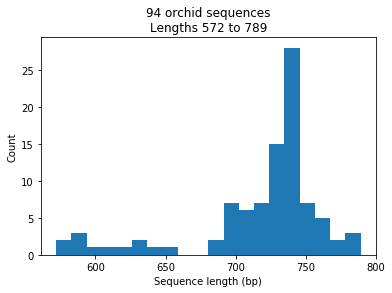

In [10]:
from Bio import SeqIO
import pylab

sizes = [len(rec) for rec in SeqIO.parse("ls_orchid.fasta", "fasta")]

pylab.hist(sizes, bins=20)
pylab.title("%i orchid sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

# Convertir Fastq a Fasta

En el home existe un archivo llamado `convert_fastq_to_fasta.py`, contiene una notación mucho más compleja y es más elaborado, vamos a estudiarlo para ver a que nos podemos enfrentar cuando buscamos scripts de referencia. También para ver buenas prácticas de programación.
